<a href="https://colab.research.google.com/github/me-sajal/Sentimental-Analysis-on-IMDB-Reviews/blob/main/Movie_Review_sentimental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!pip install gdown -U --no-cache-dir

import gdown

url = 'https://drive.google.com/drive/folders/11fQItqQfgfmRz4enyqDnM3cnvkEMijaN?usp=sharing'

gdown.download_folder(url)

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


Retrieving folder list


Processing file 1s3a1bvq1hAIEoivBWaQCpcqgvDMsReOA imdb_reviews.csv
Processing file 1jrxu9jMHl9rHmurgn1YFwXWGRflO0Ykv test_reviews.csv
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1s3a1bvq1hAIEoivBWaQCpcqgvDMsReOA
To: /content/Datasets_for_Python_Projects/imdb_reviews.csv
100%|██████████| 31.7M/31.7M [00:00<00:00, 61.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jrxu9jMHl9rHmurgn1YFwXWGRflO0Ykv
To: /content/Datasets_for_Python_Projects/test_reviews.csv
100%|██████████| 30.5M/30.5M [00:00<00:00, 38.6MB/s]
Download completed


['/content/Datasets_for_Python_Projects/imdb_reviews.csv',
 '/content/Datasets_for_Python_Projects/test_reviews.csv']

In [ ]:
train_df = pd.read_csv("/content/Datasets_for_Python_Projects/imdb_reviews.csv")
test_df = pd.read_csv("/content/Datasets_for_Python_Projects/test_reviews.csv")

<Axes: xlabel='Sentiment', ylabel='count'>

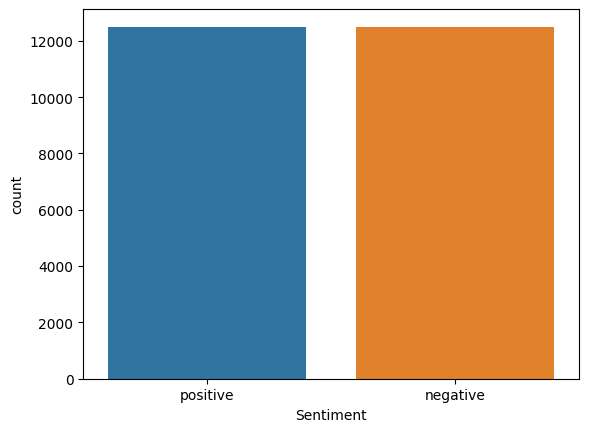

In [ ]:
sns.countplot(data = train_df, x = 'Sentiment')


In [ ]:
train_x = train_df["Reviews"]
train_y = train_df["Sentiment"]
test_x = test_df["Reviews"]
test_y = test_df["Sentiment"]

In [ ]:
labels = ['positive', 'negative']

In [ ]:
train_y.unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
exclude_list = ['not']
filtered_stopwords = [word for word in stop_words if word not in exclude_list]


In [ ]:
vectorizer = TfidfVectorizer(stop_words = filtered_stopwords)
train_x_vec = vectorizer.fit_transform(train_x)
test_x_vec = vectorizer.transform(test_x)
train_x_vec

<25000x9633 sparse matrix of type '<class 'numpy.float64'>'
	with 2250788 stored elements in Compressed Sparse Row format>

In [ ]:
# Train the model
nb_model = MultinomialNB()
nb_model.fit(train_x_vec, train_y)

MultinomialNB()

In [ ]:
# Evaluate the model on the test data
test_y_pred = nb_model.predict(test_x_vec)
test_accuracy = accuracy_score(test_y, test_y_pred)
test_confusion_matrix = confusion_matrix(test_y, test_y_pred)
test_classification_report = classification_report(test_y, test_y_pred, zero_division=1)

In [ ]:
print(f"Test Accuracy: {test_accuracy}")
print("\n")
print(f"Test Classification Report:\n{test_classification_report}")


Test Accuracy: 0.84204


Test Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.87      0.85     12500
    positive       0.86      0.81      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



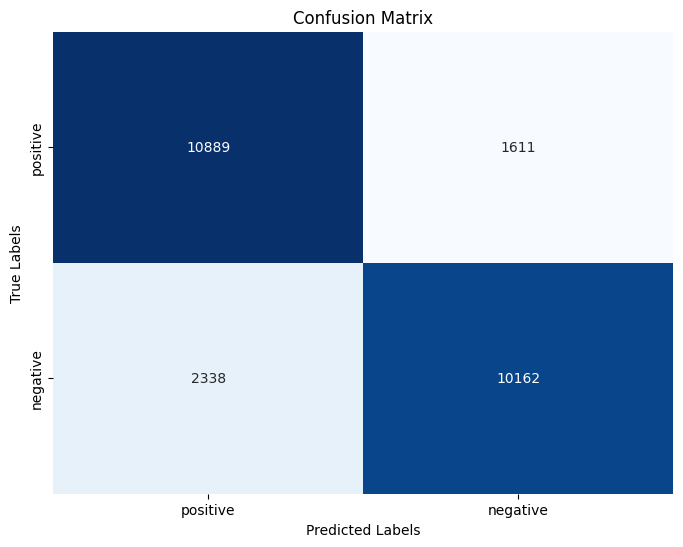

In [ ]:
# Create a heatmap of the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(train_x_vec, train_y)

LogisticRegression(max_iter=1000)

In [ ]:
# Evaluate the model on the test data
test_y_pred = lr_model.predict(test_x_vec)
test_accuracy = accuracy_score(test_y, test_y_pred)
test_confusion_matrix = confusion_matrix(test_y, test_y_pred)
test_classification_report = classification_report(test_y, test_y_pred, zero_division=1)


In [ ]:
print(f"Test Accuracy: {test_accuracy}")
print("\n")
print(f"Test Classification Report:\n{test_classification_report}")


Test Accuracy: 0.88372


Test Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.88      0.88     12500
    positive       0.88      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



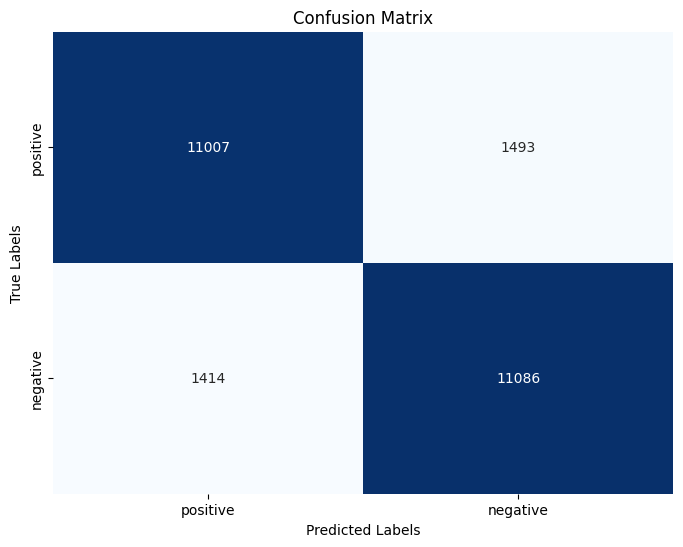

In [ ]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
svm_model = SVC(kernel='linear')  # You can try different kernels
svm_model.fit(train_x_vec, train_y)

SVC(kernel='linear')

In [ ]:
# Evaluate the model on the test data
test_y_pred = svm_model.predict(test_x_vec)
test_accuracy = accuracy_score(test_y, test_y_pred)
test_confusion_matrix = confusion_matrix(test_y, test_y_pred)
test_classification_report = classification_report(test_y, test_y_pred, zero_division=1)


In [ ]:
print(f"Test Accuracy: {test_accuracy}")
print("\n")
print(f"Test Classification Report:\n{test_classification_report}")


Test Accuracy: 0.87708


Test Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.88      0.88     12500
    positive       0.88      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



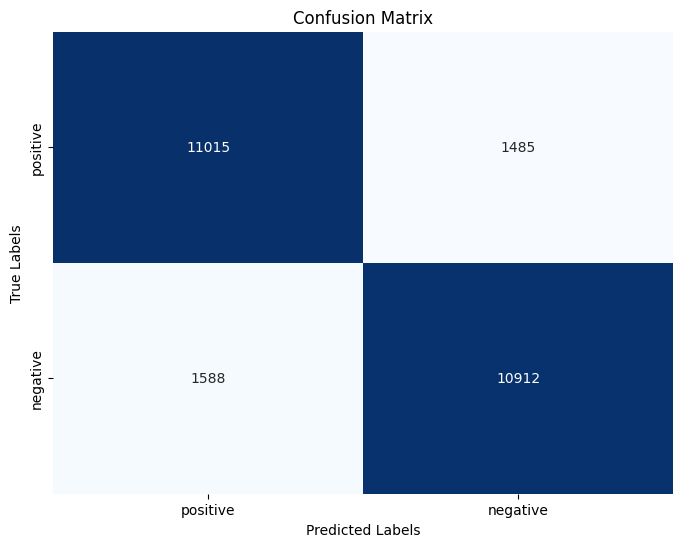

In [ ]:
labels = ['positive', 'negative']
plt.figure(figsize=(8, 6))
sns.heatmap(test_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
new_text = [
    "I feel excited about the upcoming event.",
    "The news made me feel anxious and worried.",
    "This song always brings tears to my eyes.",
    "I can't stop laughing at this funny video.",
    "The unexpected surprise filled me with joy.",
    "His rude behavior made me angry.",
    "She looked so beautiful, and I couldn't help but fall in love.",
    "The horror movie scared me to death.",
    "The thrilling rollercoaster ride made my heart race with excitement.",
    "The loss of my pet left me feeling devastated and sad.",
]

In [ ]:
# Vectorize the new text data
new_text_vectorized = vectorizer.transform(new_text)

In [ ]:
# Choose a random model
models = [svm_model, lr_model, nb_model]
def choose_best_model(models, X_test, y_test):
    best_model = None
    best_accuracy = 0.0

    for model in models:
        accuracy = model.score(X_test, y_test)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

    return best_model

best_model = choose_best_model(models, test_x_vec, test_y)
print(f"Best model: {best_model}\n Accuracy: {best_model.score(test_x_vec, test_y)}")
# Make predictions using the trained model

Best model: LogisticRegression(max_iter=1000)
 Accuracy: 0.88372


In [ ]:
predictions = best_model.predict(new_text_vectorized)

In [ ]:
# Print the predictions
for text, prediction in zip(new_text, predictions):
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {prediction}")
    print()

Text: I feel excited about the upcoming event.
Predicted Sentiment: positive

Text: The news made me feel anxious and worried.
Predicted Sentiment: positive

Text: This song always brings tears to my eyes.
Predicted Sentiment: positive

Text: I can't stop laughing at this funny video.
Predicted Sentiment: positive

Text: The unexpected surprise filled me with joy.
Predicted Sentiment: positive

Text: His rude behavior made me angry.
Predicted Sentiment: negative

Text: She looked so beautiful, and I couldn't help but fall in love.
Predicted Sentiment: positive

Text: The horror movie scared me to death.
Predicted Sentiment: positive

Text: The thrilling rollercoaster ride made my heart race with excitement.
Predicted Sentiment: positive

Text: The loss of my pet left me feeling devastated and sad.
Predicted Sentiment: negative



In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten, LSTM, BatchNormalization, Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.optimizers import Adam

In [ ]:
def remove_stopwords(text):
    filtered_words = " ".join([word for word in text.split() if word not in filtered_stopwords])
    return filtered_words
train_x

0        <START this film was just brilliant casting lo...
1        <START big hair big boobs bad music and a gian...
2        <START this has to be one of the worst films o...
3        <START the <UNK> <UNK> at storytelling the tra...
4        <START worst mistake of my life br br i picked...
                               ...                        
24995    <START this is a racist movie but worthy of st...
24996    <START bela lugosi plays a doctor who will do ...
24997    <START in a far away galaxy is a planet called...
24998    <START six degrees had me hooked i looked forw...
24999    <START as a big fan of the original film it's ...
Name: Reviews, Length: 25000, dtype: object

In [ ]:
x_train = train_x.apply(remove_stopwords)
x_test = test_x.apply(remove_stopwords)

x_train[0]

"<START film brilliant casting location scenery story direction everyone's really suited part played could imagine robert <UNK> amazing actor director <UNK> father came scottish island loved fact real connection film witty remarks throughout film great brilliant much bought film soon released <UNK> would recommend everyone watch fly fishing amazing really cried end sad know say cry film must good definitely also <UNK> two little boy's played <UNK> norman paul brilliant children often left <UNK> list think stars play grown big profile whole film children amazing praised done think whole story lovely true someone's life shared us"

In [ ]:
import tensorflow as tf
VOCAB_SIZE = 5000
output_vector_len = 120

vectorize_layer = tf.keras.layers.TextVectorization(
 max_tokens=VOCAB_SIZE,
 output_mode='int',
 output_sequence_length=output_vector_len
 )

# train vector
vectorize_layer.adapt(train_x)

In [ ]:
X_train = vectorize_layer(x_train)
X_test = vectorize_layer(x_test)

In [ ]:
# Encode sentiment labels
label_encoder = LabelEncoder()
train_y_enc = label_encoder.fit_transform(train_y)
test_y_enc = label_encoder.transform(test_y)
num_classes = len(label_encoder.classes_)

In [ ]:

num_classes

2

In [ ]:
model = Sequential()
model.add(Embedding(VOCAB_SIZE, 12, input_length=120))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
batch_size = 50
epochs = 10
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(X_train, train_y_enc, batch_size=batch_size, epochs=epochs,callbacks=[early_stopping])


Epoch 1/10
500/500 [==============================] - ETA: 0s - loss: 0.4158 - accuracy: 0.8085

500/500 [==============================] - 440s 861ms/step - loss: 0.4158 - accuracy: 0.8085
Epoch 2/10
500/500 [==============================] - ETA: 0s - loss: 0.2924 - accuracy: 0.8831

500/500 [==============================] - 422s 844ms/step - loss: 0.2924 - accuracy: 0.8831
Epoch 3/10
500/500 [==============================] - ETA: 0s - loss: 0.2491 - accuracy: 0.9051

500/500 [==============================] - 415s 830ms/step - loss: 0.2491 - accuracy: 0.9051
Epoch 4/10
500/500 [==============================] - ETA: 0s - loss: 0.2195 - accuracy: 0.9177

500/500 [==============================] - 418s 836ms/step - loss: 0.2195 - accuracy: 0.9177
Epoch 5/10
500/500 [==============================] - ETA: 0s - loss: 0.1883 - accuracy: 0.9308

500/500 [==============================] - 418s 836ms/step - loss: 0.1883 - accuracy: 0.9308
Epoch 6/10
500/500 [==============================] - ETA: 0s - loss: 0.1620 - accuracy: 0.9415

500/500 [==============================] - 417s 835ms/step - loss: 0.1620 - accuracy: 0.9415
Epoch 7/10
500/500 [==============================] - ETA: 0s - loss: 0.1366 - accuracy: 0.9518

500/500 [==============================] - 414s 828ms/step - loss: 0.1366 - accuracy: 0.9518
Epoch 8/10
500/500 [==============================] - ETA: 0s - loss: 0.1133 - accuracy: 0.9625

500/500 [==============================] - 415s 831ms/step - loss: 0.1133 - accuracy: 0.9625
Epoch 9/10
500/500 [==============================] - ETA: 0s - loss: 0.0946 - accuracy: 0.9686

500/500 [==============================] - 416s 832ms/step - loss: 0.0946 - accuracy: 0.9686
Epoch 10/10
500/500 [==============================] - ETA: 0s - loss: 0.0704 - accuracy: 0.9770

500/500 [==============================] - 413s 826ms/step - loss: 0.0704 - accuracy: 0.9770


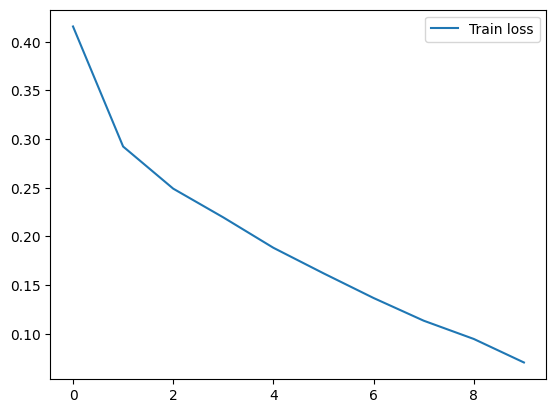

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'Train loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test data
loss, acc = model.evaluate(X_test, test_y_enc, verbose=0)
print("Test loss:", loss)
print("Test accuracy:", acc)

Test loss: 0.6973647475242615
Test accuracy: 0.8238800168037415


In [ ]:
model.save('lstm_model.h5')

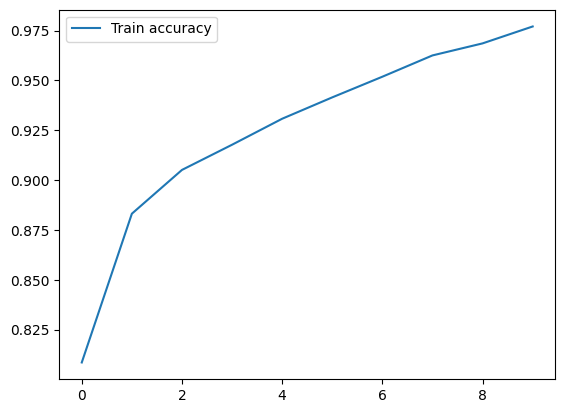

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.legend()
plt.show()

In [ ]:
# Generate predictions on the test data
test_predictions = model.predict(X_test)
predicted_labels = np.argmax(test_predictions, axis=1)

782/782 [==============================] - 179s 225ms/step


In [ ]:
# Decode integer-encoded labels back to original sentiment
predicted_sentiments = label_encoder.inverse_transform(predicted_labels)
true_sentiments = test_y

In [ ]:
confusion_mtx = confusion_matrix(true_sentiments, predicted_sentiments)


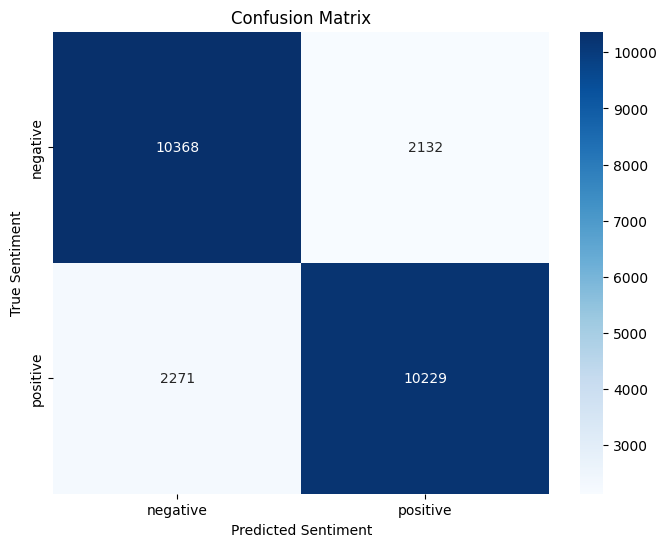

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Generate a classification report
report = classification_report(true_sentiments, predicted_sentiments)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.83      0.82     12500
    positive       0.83      0.82      0.82     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000



In [ ]:
import numpy as np

# Function to predict sentiments for a list of text inputs
def predict_sentiments(text_inputs, model, vectorize_layer, label_encoder):
    # Vectorize the text inputs using the same TextVectorization layer used during training
    text_inputs_vec = vectorize_layer(text_inputs)

    # Make predictions using the trained model
    predictions = model.predict(text_inputs_vec)

    # Convert predicted probabilities to sentiment labels using the label encoder
    predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

    return predicted_labels

# Example usage:
new_texts = [
    "I am surprised and delighted by the unexpected visit from my friend.",
    "The news about the accident was devastating and made me feel sad.",
    "The conflict with a close friend has left me feeling hurt and upset.",
    "I received a surprise gift from my partner, and it made me so happy.",
    "I feel anxious about the upcoming exam.",
    "I'm thrilled and excited about the upcoming vacation.",
    "I feel frustrated and annoyed with the constant noise outside.",
    "The scary movie gave me chills and made me fearful."]

predicted_sentiments = predict_sentiments(new_texts, model, vectorize_layer, label_encoder)

# Print the predicted sentiments
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Text: {text} \n Predicted sentiment: {sentiment}\n")


1/1 [==============================] - 0s 123ms/step
Text: I am surprised and delighted by the unexpected visit from my friend. 
 Predicted sentiment: positive

Text: The news about the accident was devastating and made me feel sad. 
 Predicted sentiment: positive

Text: The conflict with a close friend has left me feeling hurt and upset. 
 Predicted sentiment: negative

Text: I received a surprise gift from my partner, and it made me so happy. 
 Predicted sentiment: positive

Text: I feel anxious about the upcoming exam. 
 Predicted sentiment: positive

Text: I'm thrilled and excited about the upcoming vacation. 
 Predicted sentiment: negative

Text: I feel frustrated and annoyed with the constant noise outside. 
 Predicted sentiment: positive

Text: The scary movie gave me chills and made me fearful. 
 Predicted sentiment: positive



In [ ]:
import pickle

In [ ]:
pickle.dump(train_x_vec, open('count-vectorizer.pkl','wb'))
pickle.dump(nb_model, open("Movie_Review_Sentimental.pkl",'wb'))

In [ ]:
save_train_x_vec = pickle.load(open('count-vectorizer.pkl','rb'))
model = pickle.load(open("Movie_Review_Sentimental.pkl",'rb'))